Dataset shape: (1000, 21)
Confusion Matrix:
 [[94 12]
 [ 8 86]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.89      0.90       106
           1       0.88      0.91      0.90        94

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200



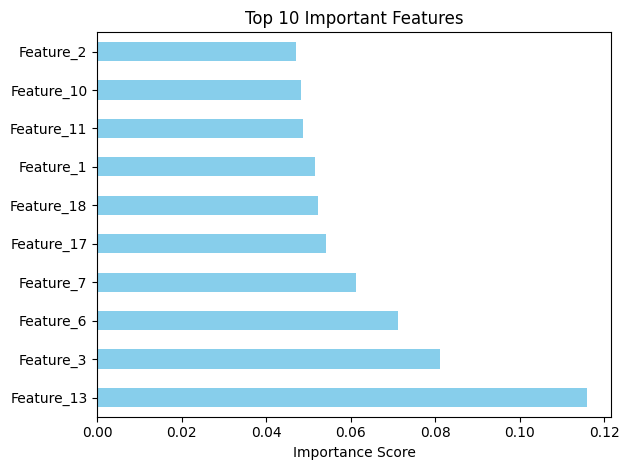

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
# Create a synthetic dataset with 1000 samples and 20 features
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15,
                           n_redundant=5, n_classes=2, random_state=42)

# Convert to DataFrame
feature_names = [f'Feature_{i}' for i in range(1, 21)]
df = pd.DataFrame(X, columns=feature_names)
df['Target'] = y

# Preview the dataset
print("Dataset shape:", df.shape)
df.head()
# Separate features and target
X = df.drop('Target', axis=1)
y = df['Target']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Initialize and train Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)

# Print evaluation metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
# Get feature importances
importances = model.feature_importances_
feat_importances = pd.Series(importances, index=feature_names)

# Plot top 10 features
feat_importances.nlargest(10).plot(kind='barh', color='skyblue')
plt.title('Top 10 Important Features')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()
